In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


### 【問題1】各種手法の実行

RNN

SimpleRNN

GRU

LSTM

ConvLSTM2D

SimpleRNNCell

GRUCell

LSTMCell

StackedRNNCells

CuDNNGRU

CuDNNLSTM

In [3]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb
from keras.callbacks import History 

Using TensorFlow backend.


In [0]:
max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

In [4]:
print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')


Loading data...
17465344/17464789 [==============================] - 7s 0us/step
25000 train sequences
25000 test sequences


In [5]:
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)


### LSTM

In [6]:
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

Build model...
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [8]:
print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train...
Instructions for updating:
Use tf.cast instead.
Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 190s 8ms/step - loss: 0.4626 - acc: 0.7810 - val_loss: 0.3866 - val_acc: 0.8300
Epoch 2/15
25000/25000 [==============================] - 201s 8ms/step - loss: 0.3034 - acc: 0.8760 - val_loss: 0.3804 - val_acc: 0.8304
Epoch 3/15
25000/25000 [==============================] - 190s 8ms/step - loss: 0.2202 - acc: 0.9136 - val_loss: 0.4316 - val_acc: 0.8285
Epoch 4/15
25000/25000 [==============================] - 191s 8ms/step - loss: 0.1571 - acc: 0.9401 - val_loss: 0.4560 - val_acc: 0.8265
Epoch 5/15
25000/25000 [==============================] - 184s 7ms/step - loss: 0.1193 - acc: 0.9570 - val_loss: 0.6236 - val_acc: 0.8200
Epoch 6/15
25000/25000 [==============================] - 195s 8ms/step - loss: 0.0847 - acc: 0.9712 - val_loss: 0.6155 - val_acc: 0.8223
Epoch 7/15
25000/25000 [==============================] - 194s 8m

### SimpleRNN

In [0]:
from keras.layers import SimpleRNN

In [10]:
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

Build model...


In [0]:
# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [13]:
print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 60s 2ms/step - loss: 0.3874 - acc: 0.8253 - val_loss: 0.6811 - val_acc: 0.6970
Epoch 2/10
25000/25000 [==============================] - 58s 2ms/step - loss: 0.3385 - acc: 0.8553 - val_loss: 0.6506 - val_acc: 0.7165
Epoch 3/10
25000/25000 [==============================] - 55s 2ms/step - loss: 0.3072 - acc: 0.8714 - val_loss: 0.7241 - val_acc: 0.7105
Epoch 4/10
25000/25000 [==============================] - 55s 2ms/step - loss: 0.3130 - acc: 0.8641 - val_loss: 0.6625 - val_acc: 0.7043
Epoch 5/10
25000/25000 [==============================] - 56s 2ms/step - loss: 0.3007 - acc: 0.8774 - val_loss: 0.7293 - val_acc: 0.6854
Epoch 6/10
25000/25000 [==============================] - 58s 2ms/step - loss: 0.2678 - acc: 0.8916 - val_loss: 0.7512 - val_acc: 0.7198
Epoch 7/10
25000/25000 [==============================] - 57s 2ms/step - loss: 0.2939 - acc: 0.8734 - val_loss: 0.7738 

### GRU

In [0]:
from keras.layers import GRU

In [30]:
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

Build model...


In [0]:
# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [32]:
print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 152s 6ms/step - loss: 0.4763 - acc: 0.7689 - val_loss: 0.3732 - val_acc: 0.8366
Epoch 2/15
25000/25000 [==============================] - 157s 6ms/step - loss: 0.2862 - acc: 0.8851 - val_loss: 0.3519 - val_acc: 0.8475
Epoch 3/15
25000/25000 [==============================] - 144s 6ms/step - loss: 0.1719 - acc: 0.9348 - val_loss: 0.4112 - val_acc: 0.8357
Epoch 4/15
25000/25000 [==============================] - 149s 6ms/step - loss: 0.1025 - acc: 0.9638 - val_loss: 0.4957 - val_acc: 0.8289
Epoch 5/15
25000/25000 [==============================] - 151s 6ms/step - loss: 0.0619 - acc: 0.9790 - val_loss: 0.5913 - val_acc: 0.8222
Epoch 6/15
25000/25000 [==============================] - 149s 6ms/step - loss: 0.0360 - acc: 0.9882 - val_loss: 0.9142 - val_acc: 0.8163
Epoch 7/15
25000/25000 [==============================] - 150s 6ms/step - loss: 0.0266 - acc: 0.9904 - val_loss: 

### CuDNNLSTM

In [0]:
from keras.layers import CuDNNLSTM

In [50]:
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(CuDNNLSTM(128))
model.add(Dense(1, activation='sigmoid'))

Build model...


In [0]:
# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [78]:
print('Train...')
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 39s 2ms/step - loss: 0.0101 - acc: 0.9966 - val_loss: 1.6067 - val_acc: 0.7914
Epoch 2/15
25000/25000 [==============================] - 35s 1ms/step - loss: 0.0301 - acc: 0.9894 - val_loss: 1.4687 - val_acc: 0.7846
Epoch 3/15
25000/25000 [==============================] - 33s 1ms/step - loss: 0.0411 - acc: 0.9848 - val_loss: 1.5024 - val_acc: 0.7899
Epoch 4/15
25000/25000 [==============================] - 32s 1ms/step - loss: 0.0345 - acc: 0.9867 - val_loss: 1.4091 - val_acc: 0.7893
Epoch 5/15
25000/25000 [==============================] - 33s 1ms/step - loss: 0.0043 - acc: 0.9989 - val_loss: 1.6224 - val_acc: 0.7883
Epoch 6/15
25000/25000 [==============================] - 36s 1ms/step - loss: 0.0050 - acc: 0.9981 - val_loss: 1.5081 - val_acc: 0.7848
Epoch 7/15
25000/25000 [==============================] - 35s 1ms/step - loss: 0.0257 - acc: 0.9903 - val_loss: 1.9975 

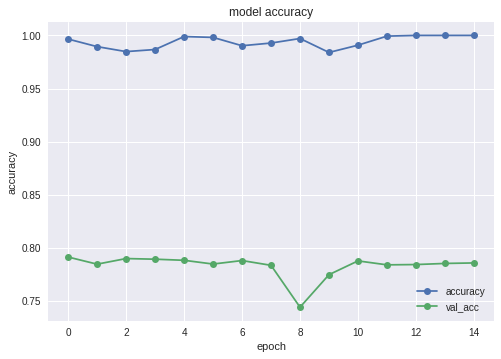

In [80]:
plt.plot(history.history['acc'],"o-",label="accuracy")
plt.plot(history.history['val_acc'],"o-",label="val_acc")
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc="lower right")
plt.show()

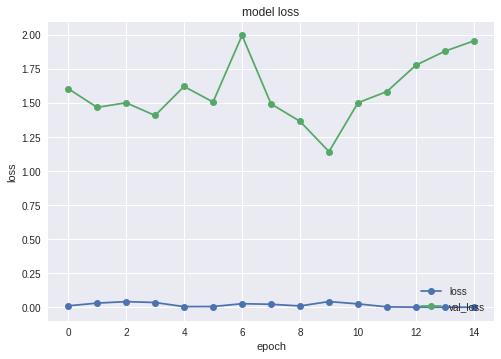

In [81]:
plt.plot(history.history['loss'],"o-",label="loss",)
plt.plot(history.history['val_loss'],"o-",label="val_loss")
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')
plt.show()

### CuDNNGRU

In [0]:
from keras.layers import CuDNNGRU

In [0]:
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(CuDNNGRU(128))
model.add(Dense(1,activation='sigmoid'))

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [57]:
print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 23s 912us/step - loss: 0.4300 - acc: 0.7946 - val_loss: 0.3496 - val_acc: 0.8464
Epoch 2/15
25000/25000 [==============================] - 26s 1ms/step - loss: 0.2345 - acc: 0.9057 - val_loss: 0.4437 - val_acc: 0.8350
Epoch 3/15
25000/25000 [==============================] - 26s 1ms/step - loss: 0.1237 - acc: 0.9539 - val_loss: 0.4806 - val_acc: 0.8300
Epoch 4/15
25000/25000 [==============================] - 27s 1ms/step - loss: 0.0635 - acc: 0.9789 - val_loss: 0.5851 - val_acc: 0.8257
Epoch 5/15
25000/25000 [==============================] - 23s 915us/step - loss: 0.0346 - acc: 0.9882 - val_loss: 0.7809 - val_acc: 0.8228
Epoch 6/15
25000/25000 [==============================] - 19s 771us/step - loss: 0.0254 - acc: 0.9915 - val_loss: 0.8770 - val_acc: 0.8144
Epoch 7/15
25000/25000 [==============================] - 18s 719us/step - loss: 0.0170 - acc: 0.9948 - val_loss:

### RNN

In [0]:
from keras.layers import RNN
from keras import backend as K
import keras.layers

In [0]:
# First, let's define a RNN Cell, as a layer subclass.

class MinimalRNNCell(Layer):

    def __init__(self, units, **kwargs):
        self.units = units
        self.state_size = units
        super(MinimalRNNCell, self).__init__(**kwargs)

    def build(self, input_shape):
        self.kernel = self.add_weight(shape=(input_shape[-1], self.units),
                                      initializer='uniform',
                                      name='kernel')
        self.recurrent_kernel = self.add_weight(
            shape=(self.units, self.units),
            initializer='uniform',
            name='recurrent_kernel')
        self.built = True

    def call(self, inputs, states):
        prev_output = states[0]
        h = K.dot(inputs, self.kernel)
        output = h + K.dot(prev_output, self.recurrent_kernel)
        return output, [output]

In [60]:
print('Build model...')
cells = MinimalRNNCell(32)
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(RNN(cells))
model.add(Dense(1, activation='sigmoid'))

Build model...


In [0]:
# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [62]:
print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 36s 1ms/step - loss: 0.4594 - acc: 0.7750 - val_loss: 0.4053 - val_acc: 0.8204
Epoch 2/15
25000/25000 [==============================] - 35s 1ms/step - loss: 0.2712 - acc: 0.8912 - val_loss: 0.3872 - val_acc: 0.8302
Epoch 3/15
25000/25000 [==============================] - 36s 1ms/step - loss: 0.1811 - acc: 0.9326 - val_loss: 0.4771 - val_acc: 0.8161
Epoch 4/15
25000/25000 [==============================] - 35s 1ms/step - loss: 0.1562 - acc: 0.9416 - val_loss: 0.7414 - val_acc: 0.8144
Epoch 5/15
25000/25000 [==============================] - 36s 1ms/step - loss: 0.1041 - acc: 0.9614 - val_loss: 0.7522 - val_acc: 0.8034
Epoch 6/15
25000/25000 [==============================] - 39s 2ms/step - loss: 0.0716 - acc: 0.9738 - val_loss: 0.9548 - val_acc: 0.7976
Epoch 7/15
25000/25000 [==============================] - 38s 2ms/step - loss: 0.0826 - acc: 0.9674 - val_loss: 0.7842 

### ConvLSTM2D

In [0]:
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import pylab as plt


In [0]:
seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')

In [0]:
def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies


Train on 950 samples, validate on 50 samples
Epoch 1/5
950/950 [==============================] - 116s 122ms/step - loss: 0.0303 - val_loss: 0.0184
Epoch 2/5
950/950 [==============================] - 115s 121ms/step - loss: 0.0039 - val_loss: 0.0032
Epoch 3/5
950/950 [==============================] - 115s 121ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 4/5
950/950 [==============================] - 116s 122ms/step - loss: 7.4829e-04 - val_loss: 8.4545e-04
Epoch 5/5
950/950 [==============================] - 115s 121ms/step - loss: 5.7298e-04 - val_loss: 8.3877e-04


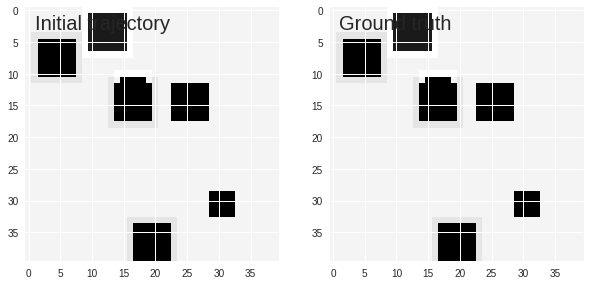

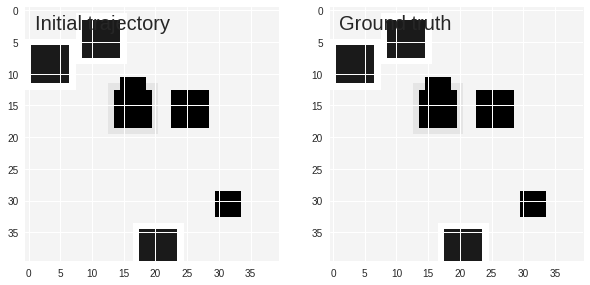

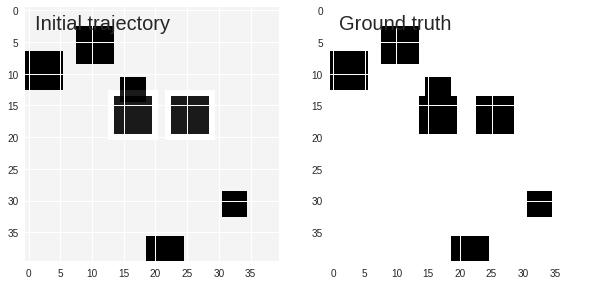

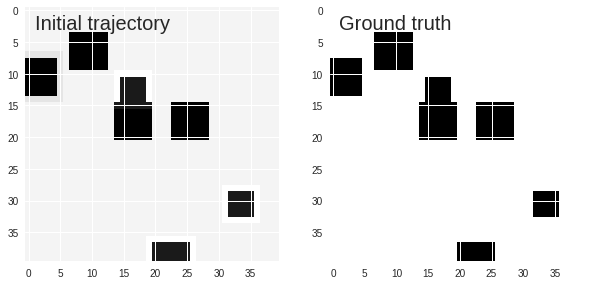

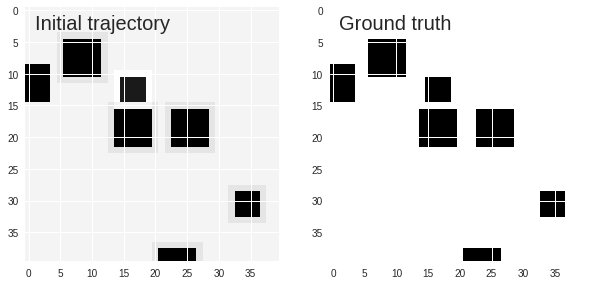

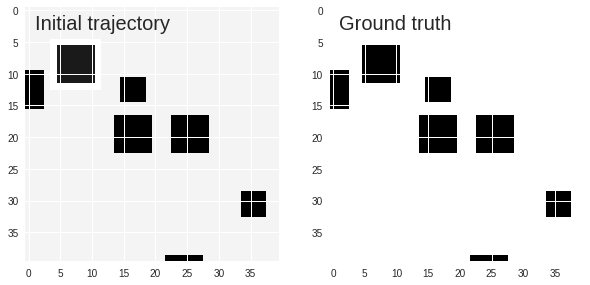

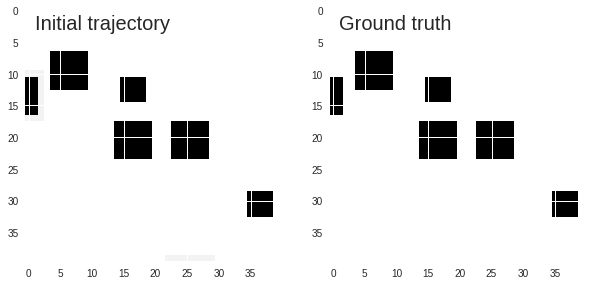

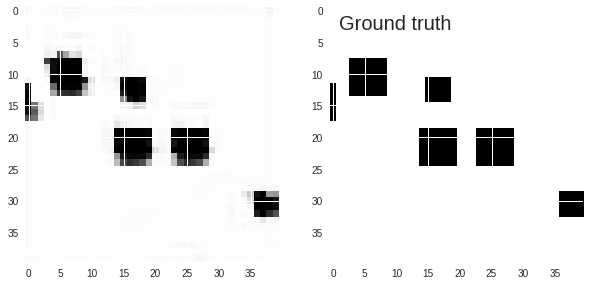

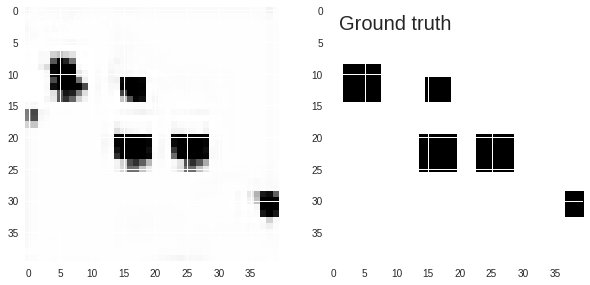

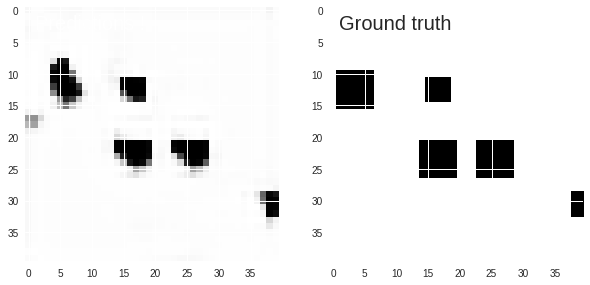

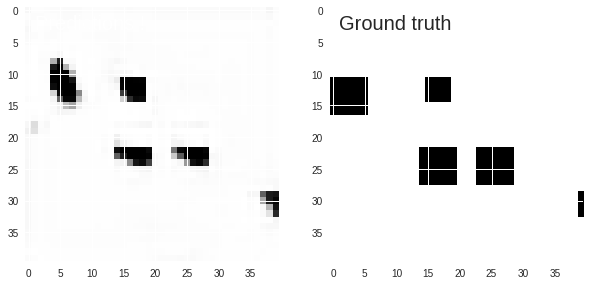

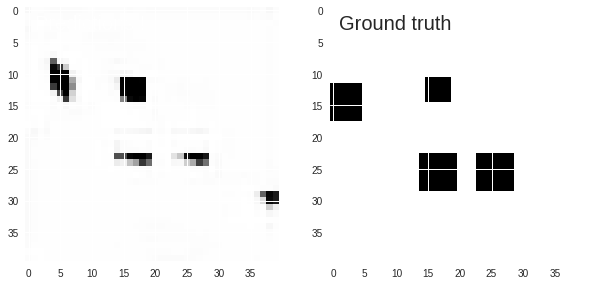

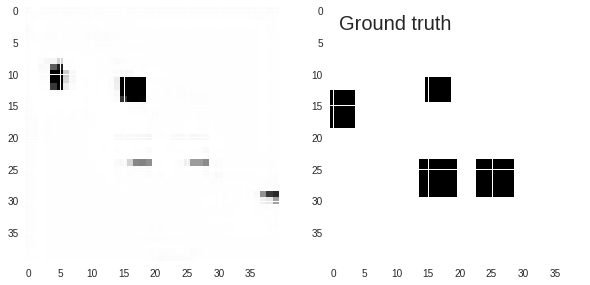

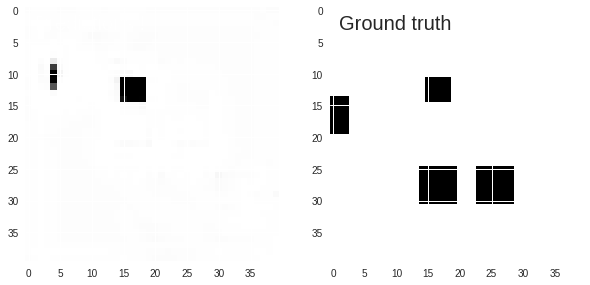

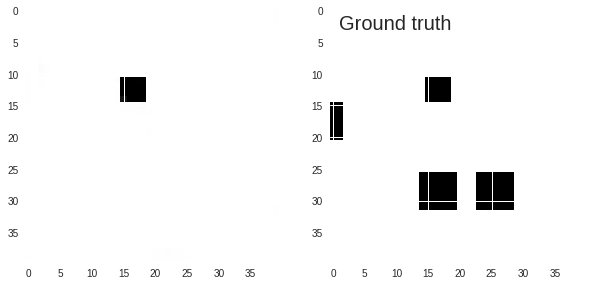

In [67]:
# Train the network
noisy_movies, shifted_movies = generate_movies(n_samples=1200)
seq.fit(noisy_movies[:1000], shifted_movies[:1000], batch_size=10,
        epochs=5, validation_split=0.05)

# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 1004
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))

In [0]:
from keras.callbacks import History

In [0]:
hist = History()

In [1]:
import pandas as pd

### 【問題2】比較結果の説明

In [9]:
index = ['LSTM','SimpleRNN','GRU','CuDNNLSTM','CuDNNGRU','RNN','ConvLSTM2D']
data = {'speed': ['8ms','2ms', '6ms','1ms','1ms','1ms','122ms'],
        'test_accuracy': ['0.80608','0.63392','0.80432','0.7858','0.81272','0.78628','nan']}


In [10]:
df = pd.DataFrame(data, index=index)

In [11]:
df

,speed,test_accuracy
LSTM,8ms,0.80608
SimpleRNN,2ms,0.63392
GRU,6ms,0.80432
CuDNNLSTM,1ms,0.7858
CuDNNGRU,1ms,0.81272
RNN,1ms,0.78628
ConvLSTM2D,122ms,nan


RNN
kerasにおけるRNNはリカレントニューラルネットワーク全体をカスタマイズして使う用でlayerクラスのサブクラス扱いである
cellを切り替えることで使用するモデルを変更する

SimpleRNN
いわゆるRNNでゲートなしのリカレントニューラルネットワーク
シンプルな分速度が早いが精度は最も低かった


LSTM
勾配消失問題を対策したモデル.記憶セルと3つのゲートがあります.GRUと精度がほとんど変わらなかったが速度は遅かった

GRU
LSTMを簡易にしたモデルで記憶セルがなくなり,ゲートも2つになっている.今回のデータではLSTMとほぼ同じ精度で速度は速かった

ConvLSTM2D
2次元なので比較できないが動画においてGROUND TRUTHほぼ同じ画像を描出できるほど精度は高かった

CuDNNGRU
GRUのGPU版で非常に高速かつ精度が高かった

CuDNNLSTM
LSTMのGPU版で非常に高速だったが、精度はやや劣っていた


### 発表用課題 CodeReading

In [ ]:
class MinimalRNNCell(keras.layers.Layer):
            def __init__(self, units, **kwargs):
                self.units = units
                self.state_size = units
                super(MinimalRNNCell, self).__init__(**kwargs)
            def build(self, input_shape):
                self.kernel = self.add_weight(shape=(input_shape[-1], self.units),
                                              initializer='uniform',
                                              name='kernel')
                self.recurrent_kernel = self.add_weight(
                    shape=(self.units, self.units),
                    initializer='uniform',
                    name='recurrent_kernel')
                self.built = True
            def call(self, inputs, states):
                prev_output = states[0]
                h = K.dot(inputs, self.kernel)
                output = h + K.dot(prev_output, self.recurrent_kernel)
                return output, [output]

In [ ]:
class LSTMCell(Layer):
    """Cell class for the LSTM layer.
    # Arguments
        units: Positive integer, dimensionality of the output space.
        activation: Activation function to use
            (see [activations](../activations.md)).
            Default: hyperbolic tangent (`tanh`).
            If you pass `None`, no activation is applied
            (ie. "linear" activation: `a(x) = x`).
        recurrent_activation: Activation function to use
            for the recurrent step
            (see [activations](../activations.md)).
            Default: hard sigmoid (`hard_sigmoid`).
            If you pass `None`, no activation is applied
            (ie. "linear" activation: `a(x) = x`).x
        use_bias: Boolean, whether the layer uses a bias vector.
        kernel_initializer: Initializer for the `kernel` weights matrix,
            used for the linear transformation of the inputs
            (see [initializers](../initializers.md)).
        recurrent_initializer: Initializer for the `recurrent_kernel`
            weights matrix,
            used for the linear transformation of the recurrent state
            (see [initializers](../initializers.md)).
        bias_initializer: Initializer for the bias vector
            (see [initializers](../initializers.md)).
        unit_forget_bias: Boolean.
            If True, add 1 to the bias of the forget gate at initialization.
            Setting it to true will also force `bias_initializer="zeros"`.
            This is recommended in [Jozefowicz et al. (2015)](
            http://www.jmlr.org/proceedings/papers/v37/jozefowicz15.pdf).
        kernel_regularizer: Regularizer function applied to
            the `kernel` weights matrix
            (see [regularizer](../regularizers.md)).
        recurrent_regularizer: Regularizer function applied to
            the `recurrent_kernel` weights matrix
            (see [regularizer](../regularizers.md)).
        bias_regularizer: Regularizer function applied to the bias vector
            (see [regularizer](../regularizers.md)).
        kernel_constraint: Constraint function applied to
            the `kernel` weights matrix
            (see [constraints](../constraints.md)).
        recurrent_constraint: Constraint function applied to
            the `recurrent_kernel` weights matrix
            (see [constraints](../constraints.md)).
        bias_constraint: Constraint function applied to the bias vector
            (see [constraints](../constraints.md)).
        dropout: Float between 0 and 1.
            Fraction of the units to drop for
            the linear transformation of the inputs.
        recurrent_dropout: Float between 0 and 1.
            Fraction of the units to drop for
            the linear transformation of the recurrent state.
        implementation: Implementation mode, either 1 or 2.
            Mode 1 will structure its operations as a larger number of
            smaller dot products and additions, whereas mode 2 will
            batch them into fewer, larger operations. These modes will
            have different performance profiles on different hardware and
            for different applications.
    """

    def __init__(self, units,
                 activation='tanh',
                 recurrent_activation='hard_sigmoid',
                 use_bias=True,
                 kernel_initializer='glorot_uniform',
                 recurrent_initializer='orthogonal',
                 bias_initializer='zeros',
                 unit_forget_bias=True,
                 kernel_regularizer=None,
                 recurrent_regularizer=None,
                 bias_regularizer=None,
                 kernel_constraint=None,
                 recurrent_constraint=None,
                 bias_constraint=None,
                 dropout=0.,
                 recurrent_dropout=0.,
                 implementation=1,
                 **kwargs):
        super(LSTMCell, self).__init__(**kwargs)
        self.units = units #1ゲートに送るnode数
        self.activation = activations.get(activation)
        self.recurrent_activation = activations.get(recurrent_activation)
        self.use_bias = use_bias
        
        #初期化
        self.kernel_initializer = initializers.get(kernel_initializer)
        self.recurrent_initializer = initializers.get(recurrent_initializer)
        self.bias_initializer = initializers.get(bias_initializer)
        self.unit_forget_bias = unit_forget_bias#forget_gateの初期化時にbias項に1を加えるかどうかそのときbias_initializerは必ずzeronになる
        
        #正則化
        self.kernel_regularizer = regularizers.get(kernel_regularizer)
        self.recurrent_regularizer = regularizers.get(recurrent_regularizer)
        self.bias_regularizer = regularizers.get(bias_regularizer)
        
        #重みに制約をつける
        self.kernel_constraint = constraints.get(kernel_constraint)
        self.recurrent_constraint = constraints.get(recurrent_constraint)
        self.bias_constraint = constraints.get(bias_constraint)

        self.dropout = min(1., max(0., dropout))
        self.recurrent_dropout = min(1., max(0., recurrent_dropout))
        self.implementation = implementation
        self.state_size = (self.units, self.units)
        self.output_size = self.units
        self._dropout_mask = None
        self._recurrent_dropout_mask = None

    def build(self, input_shape):
        # 行列積を計算するためinputのshapeの最後をとってくる
        input_dim = input_shape[-1]
        
        
        if type(self.recurrent_initializer).__name__ == 'Identity':#単位行列(0padも込み)にするならば
            def recurrent_identity(shape, gain=1.):
                return gain * np.concatenate(
                    [np.identity(shape[0])] * (shape[1] // shape[0]), axis=1) # 不明だが単位行列ようの初期化メソッドを作りたいと想像できる

            self.recurrent_initializer = recurrent_identity

        # xにかける方のweightを作成
        self.kernel = self.add_weight(shape=(input_dim, self.units * 4),#unit毎にW_x_input, W_x_forget, W_x_c, W_x_output
                                      name='kernel',
                                      initializer=self.kernel_initializer,
                                      regularizer=self.kernel_regularizer, 
                                      constraint=self.kernel_constraint)
        
        # hにかけるほうのweightを作成
        self.recurrent_kernel = self.add_weight(
            shape=(self.units, self.units * 4),#unit毎にW_h_input, W_h_forget, W_h_c, W_h_output
            name='recurrent_kernel',
            initializer=self.recurrent_initializer,
            regularizer=self.recurrent_regularizer,
            constraint=self.recurrent_constraint)
        
        
        if self.use_bias:
            if self.unit_forget_bias:
                # unit_forget_biasを設定
                def bias_initializer(_, *args, **kwargs):
                    return K.concatenate([
                        self.bias_initializer((self.units,), *args, **kwargs),
                        initializers.Ones()((self.units,), *args, **kwargs),
                        self.bias_initializer((self.units * 2,), *args, **kwargs),
                    ])
            else:
                bias_initializer = self.bias_initializer
                
            # biasを作成
            self.bias = self.add_weight(shape=(self.units * 4,),
                                        name='bias',
                                        initializer=bias_initializer,
                                        regularizer=self.bias_regularizer,
                                        constraint=self.bias_constraint)
        else:
            self.bias = None

        self.kernel_i = self.kernel[:, :self.units]#input_gate用のXとかけるkernel
        self.kernel_f = self.kernel[:, self.units: self.units * 2]#forget_gate用のXとかけるkernel
        self.kernel_c = self.kernel[:, self.units * 2: self.units * 3]#gateを通らずinput_gateとかけて記憶セルに加えるためのXとかけるkernel
        self.kernel_o = self.kernel[:, self.units * 3:]#output_gate用のXとかけるkernel

        self.recurrent_kernel_i = self.recurrent_kernel[:, :self.units] #input_gate用のh(前回のout_put)とかけるkernel
        self.recurrent_kernel_f = (
            self.recurrent_kernel[:, self.units: self.units * 2]) # forget_gate用のh(前回のout_put)とかけるkernel
        self.recurrent_kernel_c = (
            self.recurrent_kernel[:, self.units * 2: self.units * 3])#gateを通らずinput_gateとかけて記憶セルに加えるためのh(前回のoutput)とかけるkernel
        self.recurrent_kernel_o = self.recurrent_kernel[:, self.units * 3:]# output_gate用のh(前回のout_put)とかけるkernel

        if self.use_bias:
            self.bias_i = self.bias[:self.units]
            self.bias_f = self.bias[self.units: self.units * 2]
            self.bias_c = self.bias[self.units * 2: self.units * 3]
            self.bias_o = self.bias[self.units * 3:]
        else:
            self.bias_i = None
            self.bias_f = None
            self.bias_c = None
            self.bias_o = None
        self.built = True

<img src="LSTM.png">

In [ ]:
def call(self, inputs, states, training=None):
    x_i = K.dot(inputs_i, self.kernel_i)
    x_f = K.dot(inputs_f, self.kernel_f)
    x_c = K.dot(inputs_c, self.kernel_c)
    x_o = K.dot(inputs_o, self.kernel_o)

    # 記憶セルと前のoutputはstatesに保存している
    h_tm1 = states[0]  # previous memory state
    c_tm1 = states[1]
    
    h_tm1_i = h_tm1
    h_tm1_f = h_tm1
    h_tm1_c = h_tm1
    h_tm1_o = h_tm1
    
    i = self.recurrent_activation(x_i + K.dot(h_tm1_i,self.recurrent_kernel_i))
    
    f = self.recurrent_activation(x_f + K.dot(h_tm1_f,self.recurrent_kernel_f))
    
    c = f * c_tm1 + i * self.activation(x_c + K.dot(h_tm1_c,self.recurrent_kernel_c))
    
    o = self.recurrent_activation(x_o + K.dot(h_tm1_o,self.recurrent_kernel_o))

In [ ]:
 def build(self, input_shape):
        input_dim = input_shape[-1]

        if isinstance(self.recurrent_initializer, initializers.Identity):
            def recurrent_identity(shape, gain=1.):
                return gain * np.concatenate(
                    [np.identity(shape[0])] * (shape[1] // shape[0]), axis=1)

            self.recurrent_initializer = recurrent_identity

        self.kernel = self.add_weight(shape=(input_dim, self.units * 3),# unitが1つ少ない
                                      name='kernel',
                                      initializer=self.kernel_initializer,
                                      regularizer=self.kernel_regularizer,
                                      constraint=self.kernel_constraint)
        self.recurrent_kernel = self.add_weight(
            shape=(self.units, self.units * 3),# unitが1つ少ない
            name='recurrent_kernel',
            initializer=self.recurrent_initializer,
            regularizer=self.recurrent_regularizer,
            constraint=self.recurrent_constraint)

        if self.use_bias:
            if not self.reset_after:
                bias_shape = (3 * self.units,)
            else:
                # separate biases for input and recurrent kernels
                # Note: the shape is intentionally different from CuDNNGRU biases
                # `(2 * 3 * self.units,)`, so that we can distinguish the classes
                # when loading and converting saved weights.
                bias_shape = (2, 3 * self.units)
            self.bias = self.add_weight(shape=bias_shape,
                                        name='bias',
                                        initializer=self.bias_initializer,
                                        regularizer=self.bias_regularizer,
                                        constraint=self.bias_constraint)
            if not self.reset_after:
                self.input_bias, self.recurrent_bias = self.bias, None
            else:
                # NOTE: need to flatten, since slicing in CNTK gives 2D array
                self.input_bias = K.flatten(self.bias[0])
                self.recurrent_bias = K.flatten(self.bias[1])
        else:
            self.bias = None

        # update gate
        self.kernel_z = self.kernel[:, :self.units]
        self.recurrent_kernel_z = self.recurrent_kernel[:, :self.units]
        # reset gate
        self.kernel_r = self.kernel[:, self.units: self.units * 2]
        self.recurrent_kernel_r = self.recurrent_kernel[:,
                                                        self.units:
                                                        self.units * 2]
        # new gate
        self.kernel_h = self.kernel[:, self.units * 2:]
        self.recurrent_kernel_h = self.recurrent_kernel[:, self.units * 2:]

        if self.use_bias:
            # bias for inputs
            self.input_bias_z = self.input_bias[:self.units]
            self.input_bias_r = self.input_bias[self.units: self.units * 2]
            self.input_bias_h = self.input_bias[self.units * 2:]
            # bias for hidden state - just for compatibility with CuDNN
            if self.reset_after:
                self.recurrent_bias_z = self.recurrent_bias[:self.units]
                self.recurrent_bias_r = (
                    self.recurrent_bias[self.units: self.units * 2])
                self.recurrent_bias_h = self.recurrent_bias[self.units * 2:]
        else:
            self.input_bias_z = None
            self.input_bias_r = None
            self.input_bias_h = None
            if self.reset_after:
                self.recurrent_bias_z = None
                self.recurrent_bias_r = None
                self.recurrent_bias_h = None
        self.built = True


<img src="gru.png">

In [ ]:
def call(self, inputs, states, training=None):
    h_tm1 = states[0]
    
    inputs_z = inputs
    inputs_r = inputs
    inputs_h = inputs_
    
    x_z = K.dot(inputs_z, self.kernel_z)
    x_r = K.dot(inputs_r, self.kernel_r)
    x_h = K.dot(inputs_h, self.kernel_h)
    
    h_tm1_z = h_tm1
    h_tm1_r = h_tm1
    h_tm1_h = h_tm1
    
    recurrent_z = K.dot(h_tm1_z, self.recurrent_kernel_z)
    recurrent_r = K.dot(h_tm1_r, self.recurrent_kernel_r)
    
    z = self.recurrent_activation(x_z + recurrent_z)
    r = self.recurrent_activation(x_r + recurrent_r)
    
    recurrent_h = K.dot(r * h_tm1_h, self.recurrent_kernel_h)
    hh = self.activation(x_h + recurrent_h)
    
    h = z * h_tm1 + (1 - z) * hh
    
    return h, [h]